# COURSE ENROLLMENT PREDICTOR 📚💻


# PROJECT 1 - (GUIDED) 
## Anu Kumaravelan
## 300316960

$Description:$   
- A guided project to perform linear regression techniques to predict the enrollment of those courses.
- The dataset was collected from LAb02 as it was prepared and processed for this guided project, the dataset was originally from Udemy

# PART A
#  REGRESSION MODELLING

## 2.Importing the necessary libraries & Loading Data

In [1099]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, SelectKBest,f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import Ridge, Lasso 
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler 

### Loading the dataset from the folder 'Dataset' inside the project main folder 

In [1100]:
#  loading the dataset in df variable 
df=pd.read_csv(r'Dataset\Lab02_AKu16960_prepared.csv')

In [1101]:
#  sneakpeek of the dataset
df.head()

,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it_software,cat_personal_hobby
0,4.2,6340.0,54930.0,20.666667,162.0,19.383333,23.99,90.0,4.2,13453.0,179306.0,12.0,1,0,0,0
1,4.6,6833.0,21218.0,20.833333,53.0,5.233333,23.99,91.0,4.6,19993.0,55621.0,3.0,0,1,0,0
2,4.5,2826.0,14269.0,20.833333,41.0,7.133333,19.99,88.0,4.5,11922.0,53659.0,10.0,0,0,0,0
3,3.3,320.0,2088.0,17.166667,72.0,4.133333,16.99,90.0,3.3,320.0,4012.0,3.0,0,0,0,0
4,4.4,991.0,3563.0,20.666667,91.0,5.233333,28.99,77.0,4.4,2193.0,7422.0,6.0,0,0,0,0


In [1102]:
# Shape and datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542 entries, 0 to 1541
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_rating          1542 non-null   float64
 1   number_ratings      1542 non-null   float64
 2   enrollment          1542 non-null   float64
 3   last_updated        1542 non-null   float64
 4   lectures            1542 non-null   float64
 5   duration            1542 non-null   float64
 6   price2              1542 non-null   float64
 7   discount            1542 non-null   float64
 8   inst_rating         1542 non-null   float64
 9   inst_review         1542 non-null   float64
 10  inst_student        1542 non-null   float64
 11  inst_course         1542 non-null   float64
 12  cat_design          1542 non-null   int64  
 13  cat_development     1542 non-null   int64  
 14  cat_it_software     1542 non-null   int64  
 15  cat_personal_hobby  1542 non-null   int64  
dtypes: flo

- This dataset was prepared as a part of the labs and ready to used for the project with no null values

In [1103]:
# shape 
df.shape

(1542, 16)

- Since we already removed the null values and saved the dataset without the index in our lab 02, we do not have to do any more data cleaning processes

## 3. Exploratory Data Analysis

- Most of the Exploratory Data Analysis were done in Lab02, some of the investigations of the dataset are as below

### 3.c Summary Statistics

In [1104]:
#  Summary Statistics of the dataset
df.describe()

,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it_software,cat_personal_hobby
count,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000
mean,4.385992,1939.184176,11467.040856,19.820579,102.238003,11.535852,23.821388,78.643969,4.389689,13736.900130,76971.191310,22.383268,0.083009,0.247082,0.241245,0.082361
std,0.284327,2277.221846,12985.573429,1.366730,94.716064,13.028051,21.430057,16.403802,0.238732,18733.298824,94776.076402,97.943336,0.275985,0.431455,0.427977,0.275002
min,2.100000,17.000000,36.000000,11.666667,5.000000,1.000000,16.990000,30.000000,2.600000,31.000000,55.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,521.000000,3034.250000,19.333333,44.000000,4.216667,16.990000,74.000000,4.300000,1813.000000,11277.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000,1087.500000,6783.000000,20.416667,72.500000,7.566667,19.990000,86.000000,4.400000,6195.500000,39942.000000,9.000000,0.000000,0.000000,0.000000,0.000000
75%,4.600000,2459.000000,15089.750000,20.750000,124.000000,13.883333,21.990000,89.000000,4.500000,17768.000000,105319.000000,18.000000,0.000000,0.000000,0.000000,0.000000
max,4.900000,14984.000000,90763.000000,20.833333,696.000000,164.000000,199.990000,92.000000,4.800000,94805.000000,498116.000000,1420.000000,1.000000,1.000000,1.000000,1.000000


### 3.d Correlaton of the features & heatmap of the correlation

In [1105]:
# Absolute Correlation of the dataset features and saving it in a dataframe 
df_corr = df.corr().abs()
df_corr.sort_values(by='enrollment')

,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it_software,cat_personal_hobby
cat_personal_hobby,0.153363,0.034673,0.014679,0.106120,0.072131,0.085574,0.015241,0.014642,0.147372,0.090732,0.092599,0.019555,0.090137,0.171621,0.168928,1.000000
lectures,0.004107,0.003667,0.018051,0.086497,1.000000,0.730963,0.023469,0.025929,0.020568,0.015757,0.001395,0.018127,0.033922,0.207646,0.006284,0.072131
duration,0.043321,0.017608,0.022215,0.091972,0.730963,1.000000,0.007310,0.001069,0.005093,0.000736,0.014529,0.018428,0.000028,0.206195,0.003814,0.085574
discount,0.001114,0.006865,0.031635,0.064315,0.025929,0.001069,0.025512,1.000000,0.008776,0.017329,0.024901,0.024864,0.013965,0.017178,0.048579,0.014642
inst_course,0.102662,0.044345,0.041198,0.041157,0.018127,0.018428,0.004332,0.024864,0.122447,0.199721,0.248449,1.000000,0.035748,0.074032,0.004777,0.019555
last_updated,0.014153,0.022089,0.043140,1.000000,0.086497,0.091972,0.004531,0.064315,0.012541,0.022549,0.007078,0.041157,0.036930,0.106683,0.064155,0.106120
cat_design,0.080986,0.012460,0.046369,0.036930,0.033922,0.000028,0.020893,0.013965,0.084899,0.008395,0.024808,0.035748,1.000000,0.172356,0.169652,0.090137
price2,0.053085,0.039803,0.049826,0.004531,0.023469,0.007310,1.000000,0.025512,0.041018,0.019730,0.013942,0.004332,0.020893,0.073747,0.017245,0.015241
cat_development,0.007601,0.066907,0.060596,0.106683,0.207646,0.206195,0.073747,0.017178,0.021601,0.053528,0.097001,0.074032,0.172356,1.000000,0.323017,0.171621
cat_it_software,0.181792,0.067033,0.093109,0.064155,0.006284,0.003814,0.017245,0.048579,0.190313,0.003307,0.017022,0.004777,0.169652,0.323017,1.000000,0.168928


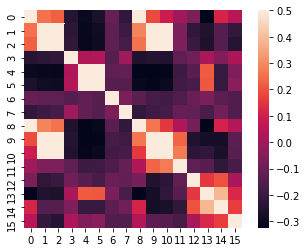

In [1106]:
#  HEatmap of the correlation of the features
heatmap_corr= np.corrcoef(df_corr)
ax = sns.heatmap(heatmap_corr,  vmax=0.5, square=True)

### 3.e Feature Observation and hypothesis

- After sorting and getting an absolute value of the correlation matrix: 
    - `inst_course`,
    - `price2`
    - `discount`
  are all not effective while 
  - `number_ratings`,
  - `inst_student`,
  - `inst_review` are comparatively effective on enrollment



### Hypothesis
$Hypothesis$: `number_ratings` is very effective in predicting course's enrollment for our regression model

### 3.f Multivariate and univariate analysis

### Features Univariate analysis  

#### Number of Ratings 

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_ratings', ylabel='Density'>

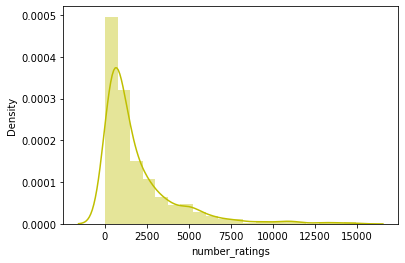

In [1107]:
sns.distplot(df.number_ratings, color= 'y', bins=20)

- The distribution of `number of ratings` is right-skewed which means that the 'mean' is towards the  right of the peak.  

####  Inst_student 

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='inst_student', ylabel='Density'>

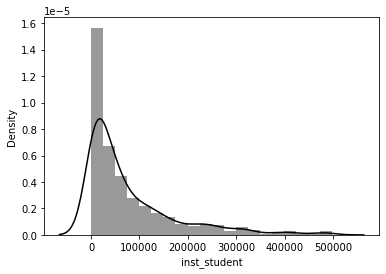

In [1108]:
sns.distplot(df.inst_student, color= 'black', bins=20)

- We see that inst_student is also right skewed which has a lot more data points in the left side than that of right 

### inst_reviews 

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='inst_review', ylabel='Density'>

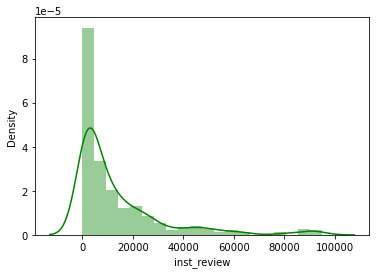

In [1109]:
sns.distplot(df.inst_review, color= 'g', bins=20)

- Similarly our inst_reviews are also right skewed where right side has a longer tail

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='discount', ylabel='Density'>

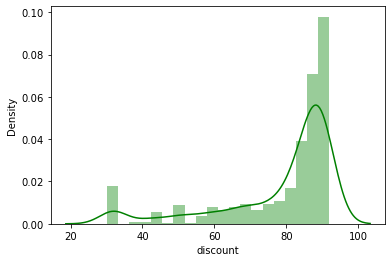

In [1110]:
sns.distplot(df.discount, color= 'g', bins=20)

- This is our discount column from table which has almsot 0 correlation (0.03) thus we are not considering it for further selection in our manual selection  

### MultiVariate Analysis

Text(0, 0.5, 'Number of rating')

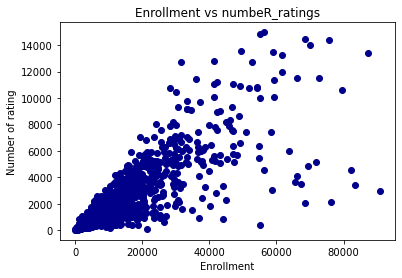

In [1111]:
plt.scatter(df.enrollment, df.number_ratings, c='Darkblue')
plt.title("Enrollment vs numbeR_ratings")
plt.xlabel("Enrollment")
plt.ylabel("Number of rating")

- Most of the datapoints in this plot of number_ratings and Enrollment are accumulated in the beginning,and eventually they are proportionally distributed as the value increases. this shows a good correlation between the two

Text(0, 0.5, 'inst_student')

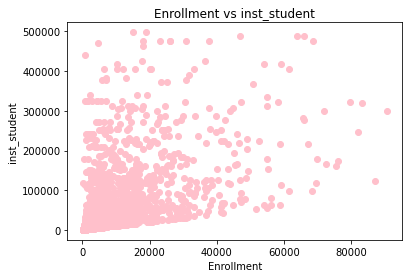

In [1112]:
plt.scatter(df.enrollment, df.inst_student, c='pink')
plt.title("Enrollment vs inst_student")
plt.xlabel("Enrollment")
plt.ylabel("inst_student")

Text(0, 0.5, 'Discount')

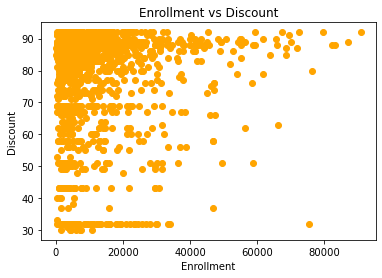

In [1113]:
plt.scatter(df.enrollment, df.discount, c='orange')
plt.title("Enrollment vs Discount")
plt.xlabel("Enrollment")
plt.ylabel("Discount")

- This proves our claim that discount is not related to enrollment and thus the correlation is pretty low

## 4. Feature Selection

- Each of the following uses feature selection, and are stored in a separate dataframe for a later use of the project 

### 4.a Saving target and feature

- Since we are trying to preddict the enrollment of the course from the dataset we save that as our target variable and everything else is saved in another variable

In [1114]:
# Storing enrollment in target
target = df.enrollment
target

0       54930.0
1       21218.0
2       14269.0
3        2088.0
4        3563.0
         ...   
1537     6212.0
1538     3254.0
1539    13987.0
1540    15793.0
1541     3161.0
Name: enrollment, Length: 1542, dtype: float64

In [1115]:
# everything else saved in feature
feature = df.drop('enrollment', axis=1)
feature

,avg_rating,number_ratings,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it_software,cat_personal_hobby
0,4.2,6340.0,20.666667,162.0,19.383333,23.99,90.0,4.2,13453.0,179306.0,12.0,1,0,0,0
1,4.6,6833.0,20.833333,53.0,5.233333,23.99,91.0,4.6,19993.0,55621.0,3.0,0,1,0,0
2,4.5,2826.0,20.833333,41.0,7.133333,19.99,88.0,4.5,11922.0,53659.0,10.0,0,0,0,0
3,3.3,320.0,17.166667,72.0,4.133333,16.99,90.0,3.3,320.0,4012.0,3.0,0,0,0,0
4,4.4,991.0,20.666667,91.0,5.233333,28.99,77.0,4.4,2193.0,7422.0,6.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,4.4,345.0,20.833333,10.0,5.900000,16.99,89.0,4.2,9250.0,159228.0,19.0,0,0,1,0
1538,3.8,693.0,20.750000,20.0,3.133333,21.99,90.0,3.8,693.0,3254.0,1.0,0,0,0,0
1539,4.2,3459.0,15.500000,30.0,1.583333,16.99,81.0,4.2,9123.0,64043.0,26.0,0,0,0,0
1540,4.5,4546.0,20.500000,267.0,32.733333,69.99,51.0,4.4,39566.0,149857.0,226.0,0,0,1,0


### 4.b Manual Selection

- Here we select the features manually based on the correlation of the dataset based on the enrollment column

In [1116]:
#  sorting the correlation based on enrollment
df.corr().abs().sort_values(by='enrollment')

,avg_rating,number_ratings,enrollment,last_updated,lectures,duration,price2,discount,inst_rating,inst_review,inst_student,inst_course,cat_design,cat_development,cat_it_software,cat_personal_hobby
cat_personal_hobby,0.153363,0.034673,0.014679,0.106120,0.072131,0.085574,0.015241,0.014642,0.147372,0.090732,0.092599,0.019555,0.090137,0.171621,0.168928,1.000000
lectures,0.004107,0.003667,0.018051,0.086497,1.000000,0.730963,0.023469,0.025929,0.020568,0.015757,0.001395,0.018127,0.033922,0.207646,0.006284,0.072131
duration,0.043321,0.017608,0.022215,0.091972,0.730963,1.000000,0.007310,0.001069,0.005093,0.000736,0.014529,0.018428,0.000028,0.206195,0.003814,0.085574
discount,0.001114,0.006865,0.031635,0.064315,0.025929,0.001069,0.025512,1.000000,0.008776,0.017329,0.024901,0.024864,0.013965,0.017178,0.048579,0.014642
inst_course,0.102662,0.044345,0.041198,0.041157,0.018127,0.018428,0.004332,0.024864,0.122447,0.199721,0.248449,1.000000,0.035748,0.074032,0.004777,0.019555
last_updated,0.014153,0.022089,0.043140,1.000000,0.086497,0.091972,0.004531,0.064315,0.012541,0.022549,0.007078,0.041157,0.036930,0.106683,0.064155,0.106120
cat_design,0.080986,0.012460,0.046369,0.036930,0.033922,0.000028,0.020893,0.013965,0.084899,0.008395,0.024808,0.035748,1.000000,0.172356,0.169652,0.090137
price2,0.053085,0.039803,0.049826,0.004531,0.023469,0.007310,1.000000,0.025512,0.041018,0.019730,0.013942,0.004332,0.020893,0.073747,0.017245,0.015241
cat_development,0.007601,0.066907,0.060596,0.106683,0.207646,0.206195,0.073747,0.017178,0.021601,0.053528,0.097001,0.074032,0.172356,1.000000,0.323017,0.171621
cat_it_software,0.181792,0.067033,0.093109,0.064155,0.006284,0.003814,0.017245,0.048579,0.190313,0.003307,0.017022,0.004777,0.169652,0.323017,1.000000,0.168928


- from the above correlation table we see that number_ratings has the best correlation to enrollment
- we choose top four out of these which are 
    - `number_ratings` : 0.826662 $(best)$
    - `'inst_student'`: 0.4649
    - `'inst_review'`: 0.407849
    - `'avg_rating'`: 0.236791 (this value is arguable as the value is closer to 0 thus not really a strong correlation but we still pick it up as we can have some varieties)

In [1117]:
# we will save this in a new dataframe called df_manual
#  we pick 4 features out of the columns of features Dataframe and save it in our df_manual DF

df_manual = feature[['number_ratings','inst_student','inst_review','avg_rating']]
df_manual

,number_ratings,inst_student,inst_review,avg_rating
0,6340.0,179306.0,13453.0,4.2
1,6833.0,55621.0,19993.0,4.6
2,2826.0,53659.0,11922.0,4.5
3,320.0,4012.0,320.0,3.3
4,991.0,7422.0,2193.0,4.4
...,...,...,...,...
1537,345.0,159228.0,9250.0,4.4
1538,693.0,3254.0,693.0,3.8
1539,3459.0,64043.0,9123.0,4.2
1540,4546.0,149857.0,39566.0,4.5


### 4.c Variance Threshold Selection

In [1118]:
#  Variance Threshold with threshold = 0.3
vt= VarianceThreshold(threshold=0.3)

#  fitting the model with features
vt.fit(feature)
vt

VarianceThreshold(threshold=0.3)

In [1119]:
#  Dataframe to display the variance of each of the features and shows whether the given feature is chosen(True) or not(Not) 
pd.DataFrame({'Variance':vt.variances_,'select_status': vt.get_support()}, index=feature.columns)

,Variance,select_status
avg_rating,8.078951e-02,False
number_ratings,5.182376e+06,True
last_updated,1.866740e+00,True
lectures,8.965315e+03,True
duration,1.696200e+02,True
price2,4.589495e+02,True
discount,2.689102e+02,True
inst_rating,5.695593e-02,False
inst_review,3.507089e+08,True
inst_student,8.976679e+09,True


In [1120]:
#  the selected features are stored into a dataframe called df_vt
df_vt = feature.iloc[:,vt.get_support()]
df_vt

,number_ratings,last_updated,lectures,duration,price2,discount,inst_review,inst_student,inst_course
0,6340.0,20.666667,162.0,19.383333,23.99,90.0,13453.0,179306.0,12.0
1,6833.0,20.833333,53.0,5.233333,23.99,91.0,19993.0,55621.0,3.0
2,2826.0,20.833333,41.0,7.133333,19.99,88.0,11922.0,53659.0,10.0
3,320.0,17.166667,72.0,4.133333,16.99,90.0,320.0,4012.0,3.0
4,991.0,20.666667,91.0,5.233333,28.99,77.0,2193.0,7422.0,6.0
...,...,...,...,...,...,...,...,...,...
1537,345.0,20.833333,10.0,5.900000,16.99,89.0,9250.0,159228.0,19.0
1538,693.0,20.750000,20.0,3.133333,21.99,90.0,693.0,3254.0,1.0
1539,3459.0,15.500000,30.0,1.583333,16.99,81.0,9123.0,64043.0,26.0
1540,4546.0,20.500000,267.0,32.733333,69.99,51.0,39566.0,149857.0,226.0


### 4.d Select K-Best MEthod

In [1121]:
# select K Best model is set with f_regression with k = 5
skb = SelectKBest(score_func = f_regression, k=5) 

# splitting the features and target into train and test: with test_size = 0.25 (25%); and random state =42
xtrain,xtest,ytrain,ytest = train_test_split(feature, target,test_size=0.25, random_state=42)

#  fitting model with our training datapoints
skb.fit_transform(xtrain, ytrain)

# storing the locations of those selected into the dataframe: df_selkbest
df_selkbest =feature.iloc[:, skb.get_support()]

# dataframe's head
df_selkbest.head()

,avg_rating,number_ratings,inst_rating,inst_review,inst_student
0,4.2,6340.0,4.2,13453.0,179306.0
1,4.6,6833.0,4.6,19993.0,55621.0
2,4.5,2826.0,4.5,11922.0,53659.0
3,3.3,320.0,3.3,320.0,4012.0
4,4.4,991.0,4.4,2193.0,7422.0


## 5 Linear Regression Models with Feature Selection, Feature transformation and Scaling 

75:25 for training and testing and random_state=42

### 5.a Empty lists to store experiments' result

In [1122]:
# creating empty lists to store 

feature_selection = []  # ---> the feature selected 
feature_transformation = []  # ---> the transformation selected 
feature_scaling = [] # ---> the scaling selected 
r2_values = [] # ---> r2 square
rmse_values=[] # ---> root mean square value

### 5.a Creating Functions to make things easier 

##### Creating a function to create a model that calls the inbuilt function LinearRegression(),  which fits the model for our feature and predicts the value and calculates the r2 and rmse scores

In [1123]:
def model_funct(): 
    # creating a linear regression model
    linear_model = LinearRegression()

    # fitting the model to our train dataset
    linear_model.fit(xtrain, ytrain)

    # predicting the model using the test values and storing it in predicted value 
    predicted_value= linear_model.predict(xtest)


    # calculating r-square with the test datapoints
    r2 = linear_model.score(xtest,ytest)
    print("R^2 = ",r2)

    # calculating root mean squared error with the predicted value and the y test values 
    mse = mean_squared_error(ytest,predicted_value)
    rmse= mse**0.5
    print("RMSE = ", rmse)
    
    return r2, rmse

In [1124]:
#  string initialization 

x=""
y=""
z=''
rs=0
ms =0

In [1125]:
# a function to append the information to the list created in the steps above
def list_append(x,y,z,rs,ms):
    feature_selection.append(x)
    feature_transformation.append(y)
    feature_scaling.append(z)
    r2_values.append(rs)
    rmse_values.append(ms)
    

### 5.b Linear Regression Model with All features

In [1126]:
#  splitting the dataset into test and train 
xtrain,xtest,ytrain,ytest = train_test_split(feature, target,test_size=0.25, random_state=42)

##### Calling the Function 

In [1127]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6500335687426264
RMSE =  7973.111766825136


##### Appending the information and Values to the list 

In [1128]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()
x="All"
y="None"
z='None'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.c Linear Regression model with All features and Polynomial Features transformation

##### Creating a model with [polynomial features with degree =2]

In [1129]:
#  assigning polynomial features in a variable with degree 2
poly_feature= PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
fit_pf = poly_feature.fit_transform(feature)

#  recreating the dataframe
poly_df = pd.DataFrame(fit_pf,columns=poly_feature.get_feature_names(feature.columns))
poly_df.head()


# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(poly_df, target,test_size=0.25, random_state=42)

##### calling the function to fit the model created with linear regression

In [1130]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6805053047638734
RMSE =  7618.096742433139


##### Appending the values to the list

In [1131]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()
x="All"
y="Poly2"
z='None'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.d Linear Regression model with All features and Log1P transformation

##### Creating a model with Log (1+x) transformation

In [1132]:
#  assigning Log (1+x) transformation in a variable 
#  creaating a copy of feature, so that it doesnt affect our original dataset
log1p_feature = feature.copy().apply(lambda x: np.log1p(x))

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(log1p_feature, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1133]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.5461482798572264
RMSE =  9079.703160741314


##### Appending the values to the list

In [1134]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()
x="All"
y="Log1P"
z='None'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.e Linear Regression model with All features and MinMax Scaling

In [1135]:
# creating a minMax scaler variable 
mms = MinMaxScaler()
scaled_feature = mms.fit_transform(feature)

# assigning scaled features and creating a linear regression model  
scaled_Df2 = pd.DataFrame(scaled_feature, columns=feature.columns)


# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_Df2, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1136]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6500335687426517
RMSE =  7973.11176682485


##### Appending the values to the list

In [1137]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()
x="All"
y="None"
z='MinMax'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.f. Linear Regression model with All features, Polynomial Features and MinMax Scaling

In [1138]:
#  assigning polynomial features in a variable with degree 2
poly_feature= PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
fit_pf = poly_feature.fit_transform(feature)

#  recreating the dataframe
poly_df = pd.DataFrame(fit_pf,columns=poly_feature.get_feature_names(feature.columns))
poly_df.head()

mms = MinMaxScaler()
scaled_feature = mms.fit_transform(poly_df)

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_feature, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1139]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6805052416885162
RMSE =  7618.097494423949


##### Appending the values to the list

In [1140]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="All"
y="Poly2"
z='MinMax'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.g. Linear Regression model with All features, Log1P Transformation and MinMax Scaling

In [1141]:
#  assigning Log (1+x) transformation in a variable 
#  creaating a copy of feature, so that it doesnt affect our original dataset

log1p_feature = feature.copy().apply(lambda x: np.log1p(x))

#  scaling the dataset after Log1P transformation with minmax scaaler
mms = MinMaxScaler()
scaled_feature1 = mms.fit_transform(log1p_feature)

#  stored in a dataframe
scaled_Df3 = pd.DataFrame(scaled_feature1, columns=feature.columns)

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_Df3, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1142]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.5461482798572264
RMSE =  9079.703160741316


##### Appending the values to the list

In [1143]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="All"
y="Log1P"
z='MinMax'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.h.1 Linear Regression model with Manually selected features with no transformation / scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_manual
 

In [1144]:
xtrain,xtest,ytrain,ytest = train_test_split(df_manual, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1145]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6460615673150593
RMSE =  8018.230178359032


##### Appending the values to the list

In [1146]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="Manual"
y="None"
z='None'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.h.2 Linear Regression model with Manually selected features with Poly transformation and no scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_manual
 

In [1147]:
#  assigning polynomial features in a variable with degree 2
poly_feature= PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
fit_pf = poly_feature.fit_transform(df_manual)

#  recreating the dataframe
poly_df = pd.DataFrame(fit_pf,columns=poly_feature.get_feature_names(df_manual.columns))
poly_df.head()

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(poly_df, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1148]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6934074734948028
RMSE =  7462.690659217611


##### Appending the values to the list

In [1149]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="Manual"
y="Poly2"
z='None'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.h.3 Linear Regression model with Manually selected features withLog 1P transformation

##### splitting the dataset into test and train for our manually selected dataframe : df_manual
 

In [1150]:
#  assigning Log (1+x) transformation in a variable 
#  creaating a copy of feature, so that it doesnt affect our original dataset

log1p_feature = df_manual.copy().apply(lambda x: np.log1p(x))


# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(log1p_feature, target,test_size=0.25, random_state=42)



##### fitting the model created with linear regression

In [1151]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.5517269811666501
RMSE =  9023.72720095899


##### Appending the values to the list

In [1152]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="Manual"
y="Log1P"
z='None'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.h.4 Linear Regression model with Manually selected features with no transformation and Min Max Scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_manual
 

In [1153]:
# creating a minMax scaler variable 
mms = MinMaxScaler()
scaled_feature = mms.fit_transform(df_manual)

# assigning scaled features and creating a linear regression model  
scaled_Df2 = pd.DataFrame(scaled_feature, columns=df_manual.columns)


# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_Df2, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1154]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6460615673150591
RMSE =  8018.230178359033


##### Appending the values to the list

In [1155]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="Manual"
y="None"
z='MinMax'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.h.5 Linear Regression model with Manually selected features with Poly2 transformation and Min Max Scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_manual
 

In [1156]:
#  assigning polynomial features in a variable with degree 2
poly_feature= PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
fit_pf = poly_feature.fit_transform(df_manual)

#  recreating the dataframe
poly_df = pd.DataFrame(fit_pf,columns=poly_feature.get_feature_names(df_manual.columns))
poly_df.head()

mms = MinMaxScaler()
scaled_feature = mms.fit_transform(poly_df)

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_feature, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1157]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6934074657376692
RMSE =  7462.690753624817


##### Appending the values to the list

In [1158]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="Manual"
y="Poly2"
z='MinMax'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.h.6 Linear Regression model with Manually selected features with Log1P transformation and Min Max Scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_manual
 

In [1159]:
#  assigning Log (1+x) transformation in a variable 
#  creaating a copy of feature, so that it doesnt affect our original dataset

log1p_feature = df_manual.copy().apply(lambda x: np.log1p(x))

mms = MinMaxScaler()
scaled_feature1 = mms.fit_transform(log1p_feature)

scaled_Df3 = pd.DataFrame(scaled_feature1, columns=df_manual.columns)

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_Df3, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1160]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.55172698116665
RMSE =  9023.727200958992


##### Appending the values to the list

In [1161]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="Manual"
y="Log1P"
z='MinMax'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.i.1 Linear Regression model with Variance Threshold Selection with no transformation / scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_vt
 

In [1162]:
xtrain,xtest,ytrain,ytest = train_test_split(df_vt, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1163]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6507972630829612
RMSE =  7964.407580836094


##### Appending the values to the list

In [1164]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="VT"
y="None"
z='None'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.i.2 Linear Regression model with  Variance Threshold Selection with Poly transformation and no scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_vt
 

In [1165]:
#  assigning polynomial features in a variable with degree 2
poly_feature= PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
fit_pf = poly_feature.fit_transform(df_vt)

#  recreating the dataframe
poly_df = pd.DataFrame(fit_pf,columns=poly_feature.get_feature_names(df_vt.columns))
poly_df.head()

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(poly_df, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1166]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.7052547821821
RMSE =  7317.084010355377


##### Appending the values to the list

In [1167]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="VT"
y="Poly2"
z='None'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.i.2 Linear Regression model with Variance Threshold with Log 1P transformation

##### splitting the dataset into test and train for our manually selected dataframe : df_vt
 

In [1168]:
#  assigning Log (1+x) transformation in a variable 
#  creaating a copy of feature, so that it doesnt affect our original dataset

log1p_feature = df_vt.copy().apply(lambda x: np.log1p(x))


# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(log1p_feature, target,test_size=0.25, random_state=42)



##### fitting the model created with linear regression

In [1169]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.550136181696814
RMSE =  9039.724402378186


##### Appending the values to the list

In [1170]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="VT"
y="Log1P"
z='None'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.i.2 Linear Regression model with Variance Threshold Selection with no transformation and Min Max Scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_vt
 

In [1171]:
# creating a minMax scaler variable 
mms = MinMaxScaler()
scaled_feature = mms.fit_transform(df_vt)

# assigning scaled features and creating a linear regression model  
scaled_Df2 = pd.DataFrame(scaled_feature, columns=df_vt.columns)


# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_Df2, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1172]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6507972630830201
RMSE =  7964.407580835421


##### Appending the values to the list

In [1173]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="VT"
y="None"
z='MinMax'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.h.2 Linear Regression model with Variance Threshold Selection with Poly2 transformation and Min Max Scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_vt
 

In [1174]:
#  assigning polynomial features in a variable with degree 2
poly_feature= PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
fit_pf = poly_feature.fit_transform(df_vt)

#  recreating the dataframe
poly_df = pd.DataFrame(fit_pf,columns=poly_feature.get_feature_names(df_vt.columns))
poly_df.head()

mms = MinMaxScaler()
scaled_feature = mms.fit_transform(poly_df)

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_feature, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1175]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.7052552924470217
RMSE =  7317.077676659886


##### Appending the values to the list

In [1176]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="VT"
y="Poly2"
z='MinMax'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.i.2 Linear Regression model with Variance Threshold Selection with Log1P transformation and Min Max Scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_vt

In [1177]:
#  assigning Log (1+x) transformation in a variable 
#  creaating a copy of feature, so that it doesnt affect our original dataset

log1p_feature = df_vt.copy().apply(lambda x: np.log1p(x))

mms = MinMaxScaler()
scaled_feature1 = mms.fit_transform(log1p_feature)

scaled_Df3 = pd.DataFrame(scaled_feature1, columns=df_vt.columns)

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_Df3, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1178]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.550136181696814
RMSE =  9039.724402378186


##### Appending the values to the list

In [1179]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="VT"
y="Log1P"
z='MinMax'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.j.1 Linear Regression model with  SelectKBest Selection with no transformation / scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_selkbest
 

In [1180]:
xtrain,xtest,ytrain,ytest = train_test_split(df_selkbest, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1181]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6453536551871059
RMSE =  8026.2448024522855


##### Appending the values to the list

In [1182]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="SelectKBest"
y="None"
z='None'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.j.2 Linear Regression model with SelectKBest Selection with Poly transformation and no scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_selkbest
 

In [1183]:
#  assigning polynomial features in a variable with degree 2
poly_feature= PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
fit_pf = poly_feature.fit_transform(df_selkbest)

#  recreating the dataframe
poly_df = pd.DataFrame(fit_pf,columns=poly_feature.get_feature_names(df_selkbest.columns))
poly_df.head()

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(poly_df, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1184]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6951090385769872
RMSE =  7441.95316500099


##### Appending the values to the list

In [1185]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="SelectKBest"
y="Poly2"
z='None'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.j.3 Linear Regression model with SelectKBest Selection withLog 1P transformation

##### splitting the dataset into test and train for our manually selected dataframe : df_selkbest
 

In [1186]:
#  assigning Log (1+x) transformation in a variable 
#  creaating a copy of feature, so that it doesnt affect our original dataset

log1p_feature = df_selkbest.copy().apply(lambda x: np.log1p(x))


# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(log1p_feature, target,test_size=0.25, random_state=42)



##### fitting the model created with linear regression

In [1187]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.5477373317199556
RMSE =  9063.794032409001


##### Appending the values to the list

In [1188]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="SelectKBest"
y="Log1P"
z='None'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.j.4 Linear Regression model with SelectKBest Selection with no transformation and Min Max Scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_selkbest
 

In [1189]:
# creating a minMax scaler variable 
mms = MinMaxScaler()
scaled_feature = mms.fit_transform(df_selkbest)

# assigning scaled features and creating a linear regression model  
scaled_Df2 = pd.DataFrame(scaled_feature, columns=df_selkbest.columns)


# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_Df2, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1190]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6453536551871162
RMSE =  8026.244802452169


##### Appending the values to the list

In [1191]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="SelectKBest"
y="None"
z='MinMax'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.j.5 Linear Regression model with SelectKBest Selection with Poly2 transformation and Min Max Scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_selkbest
 

In [1192]:
#  assigning polynomial features in a variable with degree 2
poly_feature= PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
fit_pf = poly_feature.fit_transform(df_selkbest)

#  recreating the dataframe
poly_df = pd.DataFrame(fit_pf,columns=poly_feature.get_feature_names(df_selkbest.columns))
poly_df.head()

mms = MinMaxScaler()
scaled_feature = mms.fit_transform(poly_df)

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_feature, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1193]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.6951089708234317
RMSE =  7441.953991884734


##### Appending the values to the list

In [1194]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="SelectKBest"
y="Poly2"
z='MinMax'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 5.j.6 Linear Regression model with SelectKBest Selection with Log1P transformation and Min Max Scaling

##### splitting the dataset into test and train for our manually selected dataframe : df_selkbest
 

In [1195]:
#  assigning Log (1+x) transformation in a variable 
#  creaating a copy of feature, so that it doesnt affect our original dataset

log1p_feature = df_selkbest.copy().apply(lambda x: np.log1p(x))

mms = MinMaxScaler()
scaled_feature1 = mms.fit_transform(log1p_feature)

scaled_Df3 = pd.DataFrame(scaled_feature1, columns=df_selkbest.columns)

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_Df3, target,test_size=0.25, random_state=42)

##### fitting the model created with linear regression

In [1196]:
#  calling the function and storing the values into variables called a,b
a, b =model_funct()

R^2 =  0.5477373317199554
RMSE =  9063.794032409003


##### Appending the values to the list

In [1197]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="SelectKBest"
y="Log1P"
z='MinMax'
rs=a
ms =b

list_append(x,y,z,rs,ms)

### 6. Linear Regression Model with Lasso

 - Using all the features for this model and finding the alpha which is appropriate. 
 - 75 to 25 for training and testing with random state = 42
 - not normalized (Normalize =False)

In [1198]:
alpha_set =np.linspace(1,0.0000001,30)
alpha_set

array([1.00000000e+00, 9.65517245e-01, 9.31034490e-01, 8.96551734e-01,
       8.62068979e-01, 8.27586224e-01, 7.93103469e-01, 7.58620714e-01,
       7.24137959e-01, 6.89655203e-01, 6.55172448e-01, 6.20689693e-01,
       5.86206938e-01, 5.51724183e-01, 5.17241428e-01, 4.82758672e-01,
       4.48275917e-01, 4.13793162e-01, 3.79310407e-01, 3.44827652e-01,
       3.10344897e-01, 2.75862141e-01, 2.41379386e-01, 2.06896631e-01,
       1.72413876e-01, 1.37931121e-01, 1.03448366e-01, 6.89656103e-02,
       3.44828552e-02, 1.00000000e-07])

In [1199]:
# splitting the features and target into train and test: with test_size = 0.25 (25%); and random state =42
xtrain,xtest,ytrain,ytest = train_test_split(feature, target,test_size=0.25, random_state=42)

In [1200]:
#  we will temporarily save the information into thesse empty lists before finalizing and picking the best alpha

temp_r2=[]
temp_rmse=[]
temp_model=[]

#  for loop to iterate the alphas and their equivalent
for a in alpha_set:
    lasso_model = Lasso(alpha = a, normalize = False, max_iter = 5000)
    lasso_model.fit(xtrain, ytrain)
    predicted = lasso_model.predict(xtest)
    
    temp_r2.append(lasso_model.score(xtrain, ytrain))
    rmse = mean_squared_error(ytest, predicted)**0.5
    temp_rmse.append(rmse)
    temp_model.append(ridge_model)
    print("Alpha %.5f RMSE %.5f" %(a, rmse))
    
lasso_result = np.vstack((alpha_set, temp_rmse, temp_r2)).T   
lasso_df = pd.DataFrame(lasso_result, columns=['Alpha', 'RMSE', "R2"])
lasso_df

Alpha 1.00000 RMSE 7972.10188
Alpha 0.96552 RMSE 7972.13627
Alpha 0.93103 RMSE 7972.17068
Alpha 0.89655 RMSE 7972.20513
Alpha 0.86207 RMSE 7972.23961
Alpha 0.82759 RMSE 7972.27412
Alpha 0.79310 RMSE 7972.30866
Alpha 0.75862 RMSE 7972.34323
Alpha 0.72414 RMSE 7972.37784
Alpha 0.68966 RMSE 7972.41247
Alpha 0.65517 RMSE 7972.44714
Alpha 0.62069 RMSE 7972.48184
Alpha 0.58621 RMSE 7972.51656
Alpha 0.55172 RMSE 7972.55133
Alpha 0.51724 RMSE 7972.58612
Alpha 0.48276 RMSE 7972.62094
Alpha 0.44828 RMSE 7972.65580
Alpha 0.41379 RMSE 7972.69068
Alpha 0.37931 RMSE 7972.72560
Alpha 0.34483 RMSE 7972.76055
Alpha 0.31034 RMSE 7972.79553
Alpha 0.27586 RMSE 7972.83054
Alpha 0.24138 RMSE 7972.86559
Alpha 0.20690 RMSE 7972.90066
Alpha 0.17241 RMSE 7972.93577
Alpha 0.13793 RMSE 7972.97090
Alpha 0.10345 RMSE 7973.00607
Alpha 0.06897 RMSE 7973.04127
Alpha 0.03448 RMSE 7973.07650
Alpha 0.00000 RMSE 7973.11177


,Alpha,RMSE,R2
0,1.000000e+00,7972.101884,0.777718
1,9.655172e-01,7972.136268,0.777718
2,9.310345e-01,7972.170684,0.777718
3,8.965517e-01,7972.205130,0.777718
4,8.620690e-01,7972.239609,0.777718
5,8.275862e-01,7972.274118,0.777718
6,7.931035e-01,7972.308659,0.777718
7,7.586207e-01,7972.343232,0.777718
8,7.241380e-01,7972.377836,0.777718
9,6.896552e-01,7972.412471,0.777718


##### Finding the best alpha (Minimum RMSE) and sorting it based on the result

In [1201]:
min_alpha_lasso = lasso_df.sort_values(by=['RMSE', 'R2'], ascending=[True, False]).head(1)
# the alpha with minimum RMSE 
min_alpha_lasso

,Alpha,RMSE,R2
0,1.0,7972.101884,0.777718


##### Appending the apha and information to the list 

In [1202]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="Lasso, not normalized alpha = 1.0"
y="None"
z='None'
rs=0.777718
ms =7972.101884

list_append(x,y,z,rs,ms)

### 7. Linear Regression Model with Ridge

 - Using all the features for this model and finding the alpha which is appropriate. 
 - 75 to 25 for training and testing with random state = 42
 - not normalized (Normalize =False)

In [1203]:
alpha_set = 10**np.linspace(5,-5,20)
alpha_set

array([1.00000000e+05, 2.97635144e+04, 8.85866790e+03, 2.63665090e+03,
       7.84759970e+02, 2.33572147e+02, 6.95192796e+01, 2.06913808e+01,
       6.15848211e+00, 1.83298071e+00, 5.45559478e-01, 1.62377674e-01,
       4.83293024e-02, 1.43844989e-02, 4.28133240e-03, 1.27427499e-03,
       3.79269019e-04, 1.12883789e-04, 3.35981829e-05, 1.00000000e-05])

In [1204]:
# splitting the features and target into train and test: with test_size = 0.25 (25%); and random state =42
xtrain,xtest,ytrain,ytest = train_test_split(feature, target,test_size=0.25, random_state=42)

In [1205]:
#  we will temporarily save the information into thesse empty lists before finalizing and picking the best alpha

temp_r2=[]
temp_rmse=[]
temp_model=[]

#  for loop to iterate the alphas and their equivalent
for a in alpha_set:
    ridge_model = Ridge(alpha = a, normalize = False, max_iter = 5000)
    ridge_model.fit(xtrain, ytrain)
    predicted = ridge_model.predict(xtest)
    
    temp_r2.append(ridge_model.score(xtrain, ytrain))
    rmse = mean_squared_error(ytest, predicted)**0.5
    temp_rmse.append(rmse)
    temp_model.append(ridge_model)
    print("Alpha %.2f RMSE %.2f" %(a, rmse))
    
ridge_result = np.vstack((alpha_set, temp_rmse, temp_r2)).T   
ridge_df = pd.DataFrame(ridge_result, columns=['Alpha', 'RMSE', "R2"])
ridge_df

Alpha 100000.00 RMSE 7956.92
Alpha 29763.51 RMSE 7956.03
Alpha 8858.67 RMSE 7955.13
Alpha 2636.65 RMSE 7954.11
Alpha 784.76 RMSE 7952.72
Alpha 233.57 RMSE 7950.05
Alpha 69.52 RMSE 7951.58
Alpha 20.69 RMSE 7958.25
Alpha 6.16 RMSE 7965.50
Alpha 1.83 RMSE 7970.18
Alpha 0.55 RMSE 7972.15
Alpha 0.16 RMSE 7972.82
Alpha 0.05 RMSE 7973.02
Alpha 0.01 RMSE 7973.09
Alpha 0.00 RMSE 7973.10
Alpha 0.00 RMSE 7973.11
Alpha 0.00 RMSE 7973.11
Alpha 0.00 RMSE 7973.11
Alpha 0.00 RMSE 7973.11
Alpha 0.00 RMSE 7973.11


,Alpha,RMSE,R2
0,100000.000000,7956.915156,0.772466
1,29763.514416,7956.031098,0.772710
2,8858.667904,7955.131122,0.773101
3,2636.650899,7954.108968,0.773815
4,784.759970,7952.717299,0.774789
5,233.572147,7950.052975,0.775997
6,69.519280,7951.578284,0.776963
7,20.691381,7958.252987,0.777447
8,6.158482,7965.502273,0.777656
9,1.832981,7970.177386,0.777710


##### Finding the best alpha (Minimum RMSE) and sorting it based on the result

In [1206]:
min_alpha_ridge = ridge_df.sort_values(by=['RMSE', 'R2'], ascending=[True, False]).head(1)
# the alpha with minimum RMSE 
min_alpha_ridge

,Alpha,RMSE,R2
5,233.572147,7950.052975,0.775997


##### Appending the apha and information to the list 

In [1207]:
#  x --> Feature Selected 
#  y --> Feature Transformed
#  z --> Scaling used 
#  rs --> r2 score recieved from model_func()
#  ms --> rmse from model_func()

x="Ridge, not normalized alpha =233.572147"
y="None"
z='None'
rs=0.775997
ms =7950.052975

list_append(x,y,z,rs,ms)

### 8. Plot and summary analysis

##### Combining the lists into a DataFrame to view all the infromation for comparisions

In [1208]:
combination_list = np.vstack((feature_selection,feature_transformation,feature_scaling,r2_values,rmse_values)).T
combo_df = pd.DataFrame(combination_list,columns = ('Feature Selection', 'Feature Transformation', 'Feature Scaling', 'R2', 'RMSE'))
combo_df

,Feature Selection,Feature Transformation,Feature Scaling,R2,RMSE
0,All,None,None,0.6500335687426264,7973.111766825136
1,All,Poly2,None,0.6805053047638734,7618.096742433139
2,All,Log1P,None,0.5461482798572264,9079.703160741314
3,All,None,MinMax,0.6500335687426517,7973.11176682485
4,All,Poly2,MinMax,0.6805052416885162,7618.097494423949
5,All,Log1P,MinMax,0.5461482798572264,9079.703160741316
6,Manual,None,None,0.6460615673150593,8018.230178359032
7,Manual,Poly2,None,0.6934074734948028,7462.690659217611
8,Manual,Log1P,None,0.5517269811666501,9023.72720095899
9,Manual,None,MinMax,0.6460615673150591,8018.230178359033


##### Selecting the best model 

In [1209]:
combo_df.sort_values(by=['RMSE','R2'], ascending=[True, False]).head(1)

,Feature Selection,Feature Transformation,Feature Scaling,R2,RMSE
16,VT,Poly2,MinMax,0.7052552924470217,7317.077676659886


### Our $best$  $model$ is `Variance Threshold with Polynomial Transformation and MinMax Scaling` which has the `least RMSE and max R2`

### Predictions using our best model  

In [1210]:
#  assigning polynomial features in a variable with degree 2
poly_feature= PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
fit_pf = poly_feature.fit_transform(df_vt)

#  recreating the dataframe
poly_df = pd.DataFrame(fit_pf,columns=poly_feature.get_feature_names(df_vt.columns))
poly_df.head()

mms = MinMaxScaler()
scaled_feature = mms.fit_transform(poly_df)

# splitting the features dataset into test and train dataset with target obtained from the tranformation
xtrain,xtest,ytrain,ytest = train_test_split(scaled_feature, target,test_size=0.25, random_state=42)


a, b = model_funct()

R^2 =  0.7052552924470217
RMSE =  7317.077676659886


### PRedicted value 

In [1211]:
predicted_value

array([ -238.99680501,   990.01257559,  4637.85103855,  5507.42241109,
        4488.16281084,  8602.83841014, 39034.55238697,  5359.12751489,
       16807.6258358 ,  6477.87934084,  -357.76169532, 11613.97709476,
        5149.65619019, 10983.78734358,  2894.21556262,  5383.75323227,
        6490.1664796 ,  1220.69268425, 10750.18148647,  1566.17812625,
        8044.62089761,  1983.77764246, 18341.36988246,  2097.74813315,
       19413.66019992, 30797.89174997,  1527.59591347, 17267.40670227,
        8382.04334022, 35711.39181847,  4844.8611527 ,  2278.55324351,
        5867.35950845, 32936.5428443 ,  3950.18885943,  1987.36596706,
       10814.18692745,   952.1839971 ,  8037.10987782,  1707.94200256,
        4416.2881047 ,  2357.94161665,  1598.51749831, 11055.49316163,
        5108.38264415,  5912.38426984, 36375.95155333, 14713.29376792,
        1403.11722168, 23042.01729663,  3506.20868017,  2616.16457176,
       11557.50512983,  3281.65654096, 30814.62093577,  3158.56359292,
      

### Scatter Plot between the actual and predicted values

Text(0, 0.5, 'actual')

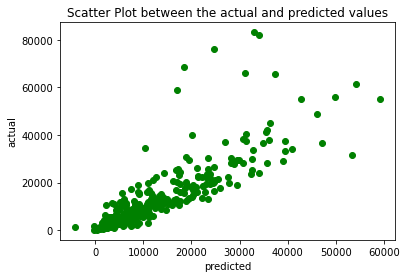

In [1212]:
actual = ytest

plt.scatter(predicted_value, actual,c='g')
plt.title("Scatter Plot between the actual and predicted values")
plt.xlabel("predicted")
plt.ylabel("actual")

### Coefficient of our best model  

In [1213]:
coefficient=pd.DataFrame(zip( df_vt,linear_model.coef_), columns=['Feature', 'Coefficient'])
coefficient

,Feature,Coefficient
0,number_ratings,88166.052026
1,last_updated,-29516.702771
2,lectures,-31375.654837
3,duration,75052.695177
4,price2,18654.019896
5,discount,8389.441240
6,inst_review,26240.719371
7,inst_student,33120.979055
8,inst_course,-140719.047793


- For this particular dataset we have the best model for predicting our course enrollmetn is `"Variance Threshold with poly2 transformation and minmax scaling` 
- The above scatter plot shows the plotting between the predicted and the actual values 
- The coefficients are the from the feature table we had and selected the from our variance threshold dataframe 


#### Why this modelling works better than the others?

- For a matter of fact, we all agree that the data from the real world is not perfect. All our modelling are good for an ideal dataset which in theory alone exists. These modelling are built with some assumptions that fit only a particular dataset and not all. 
- When a particular dataset agrees with the assumptions made in designing the modelling technique, that particualr model will be our best fit but it is not the case all the time. Sometimes, the dataset seems to have similar feature and does not fit our model like the previous dataset. This brings the necessity to evaluate and run the training and testing, calculating RMSE and R2 all comes in handy.
- By evaluating using different methods and techniques we could find our the best fit with overfitting or underfitting our dataset








Ref: http://appliedpredictivemodeling.com/
Data Science and Big Data Analytics, EMC Education Services